In [1]:
# Import libraries
# pip install matplotlib
from matplotlib import pyplot as plt
import numpy as np
# pip install seaborn
import seaborn as sb
# pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
# pip install plotly
import plotly.express as px

In [13]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/jainamm-gala/Stock-Market-Data-Visualization-Using-Python/main/dataset/BAJAJFINSV.csv", parse_dates=["Date"])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [3]:
# Preprocessing of the data
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [4]:
new_idx = pd.date_range("2008-05-26", "2021-04-30", freq="1D")
df = df.reindex(new_idx)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446.0,1.726368e+14,NaN,908264.0,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144.0,2.488370e+14,NaN,677627.0,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759.0,2.837530e+14,NaN,774895.0,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302.0,2.982921e+14,NaN,1006161.0,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669.0,1.945929e+14,NaN,462832.0,0.1514


In [5]:
# Date vs Volume plot
sb.set_theme()
sb.set(rc={'figure.figsize':(15,8)})
fig = px.line(df, x='Date', y="Volume")
fig.show()

In [6]:
# Date vs High price of the day plot
fig = px.line(df, x='Date', y="High")
fig.show()

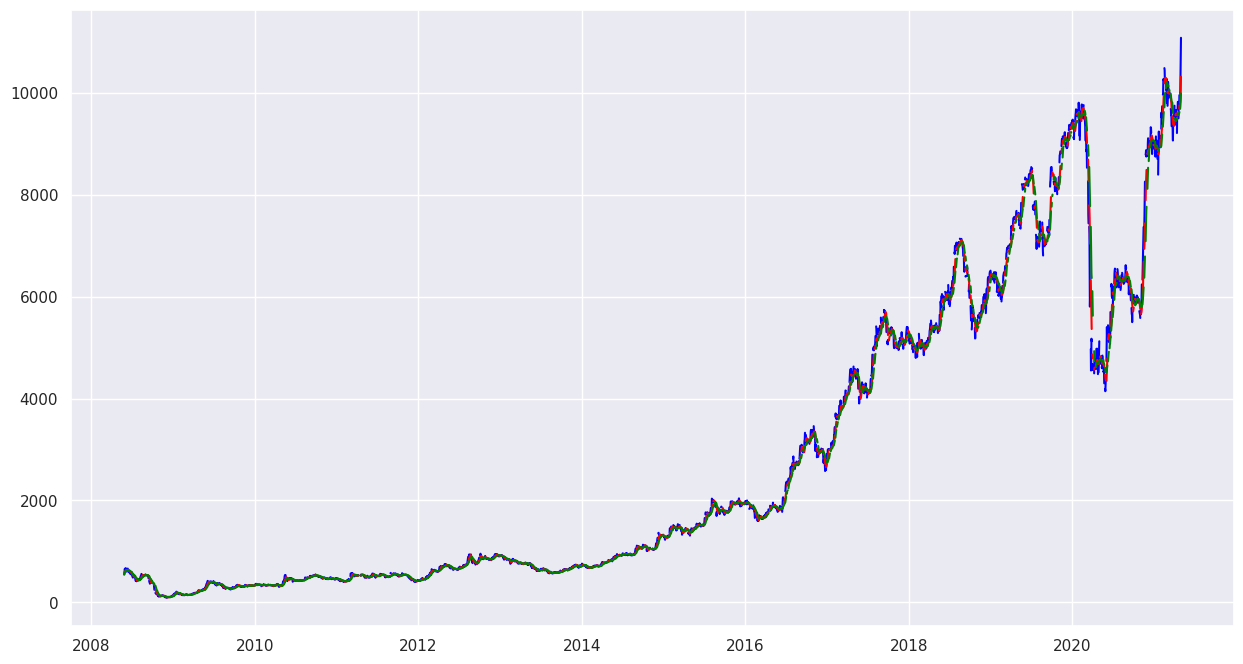

In [7]:
# Simple Moving Average (SMA) for 10 and 20 days
df_sma=df.copy()
df_sma['SMA_10']=df_sma.VWAP.rolling(10, min_periods=1).mean()
df_sma['SMA_20']=df_sma.VWAP.rolling(20, min_periods=1).mean()

plt.plot(df_sma['Date'], df_sma['VWAP'], color='blue')
plt.plot(df_sma['Date'],df_sma['SMA_10'], color='red')
plt.plot(df_sma['Date'],df_sma['SMA_20'], color='green')
plt.show()

In [8]:
df_sma.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA_10,SMA_20
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446.0,1.726368e+14,NaN,908264.0,0.2888,548.8500,548.8500
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144.0,2.488370e+14,NaN,677627.0,0.1558,560.5000,560.5000
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759.0,2.837530e+14,NaN,774895.0,0.1689,579.7900,579.7900
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302.0,2.982921e+14,NaN,1006161.0,0.2225,599.7425,599.7425
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669.0,1.945929e+14,NaN,462832.0,0.1514,607.0760,607.0760


<ipython-input-9-1b43e3e7764f>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





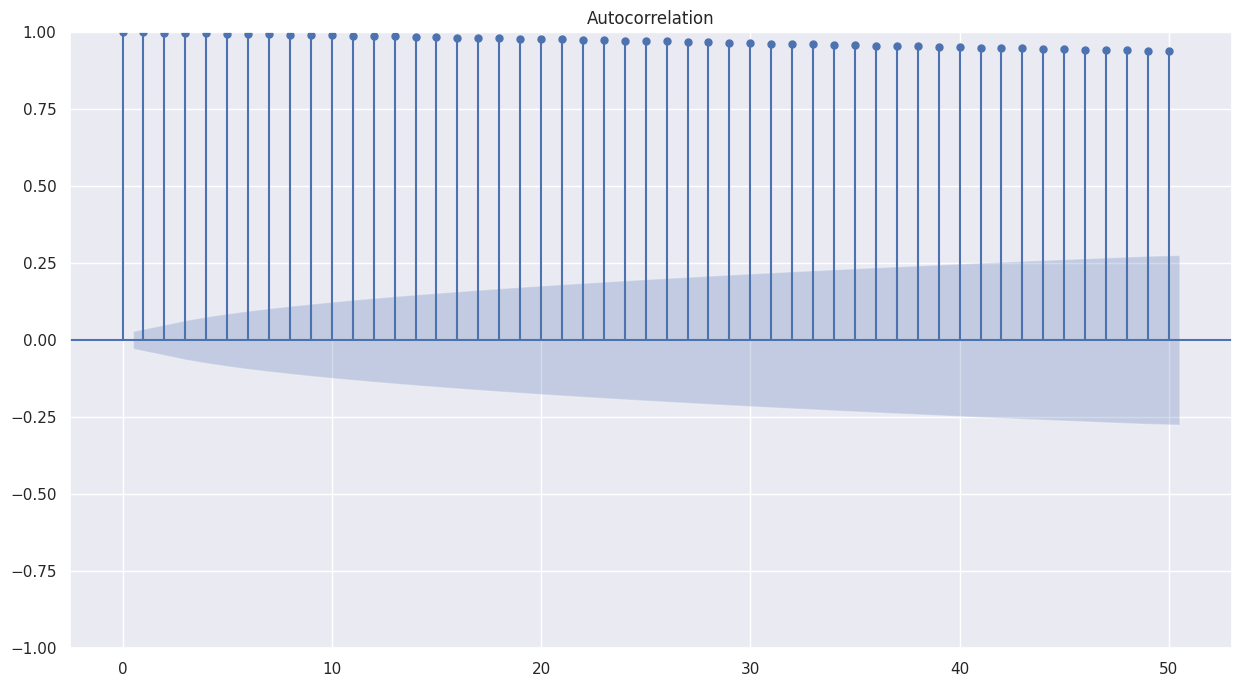

In [9]:
# Autocorrelation plot
df.isnull().sum()
df['VWAP'].interpolate(method='linear',axis=0,inplace=True)
plot_acf(df['VWAP'], lags=50)
plt.show()

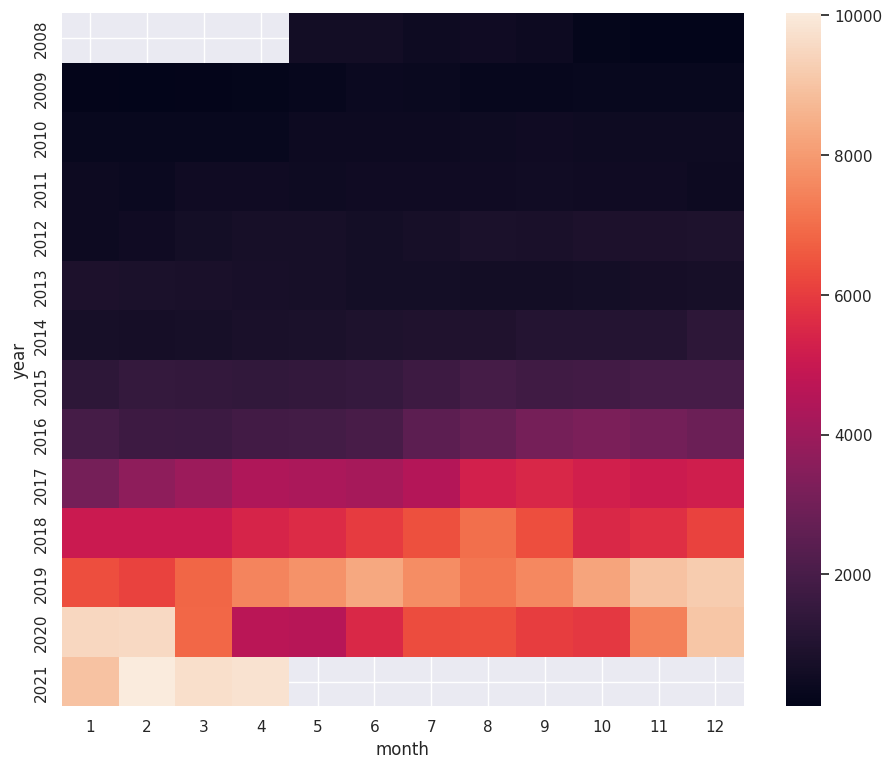

In [10]:
# Heatmap
df_temp=df.copy()
df_temp['day'] = df_temp.index.day
df_temp['month'] = df_temp.index.month
df_temp['year'] = df_temp.index.year

df_m=df_temp.groupby(['month', 'year']).mean(numeric_only=True)
df_m
df_m=df_m.unstack(level=0)
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df_m['VWAP'])
plt.show()